# Notebook for airbnb project 

+ Question 1 How many listings are in the neighbourhood and where are they? 
+ Question 2 Does seasonality influence prices and room availabiltity? 
+ Question 3 Which properties or features of the listing are associated with high prices?
+ Question 4 Can we predict the price with those features to inform new hosts? 
+ Question 5 Does the number of listing in an area impact the rents in that neighbourhood? 
+ Question 6 Does listing reviews impact prices and demand? 
+ Question 7 Does the lisitngs prices get influence by amenities in the locality - schools, resturants, public transportation? 

In [48]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_train_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer


In [2]:
#Loading Data
df_seattle_listings = pd.read_csv(".\\src_data\\airbnb\\seattle\\project_data\\listings.csv")
df_seattle_calendar = pd.read_csv(".\\src_data\\airbnb\\seattle\\project_data\\calendar.csv")
df_seattle_reviews = pd.read_csv(".\\src_data\\airbnb\\seattle\\project_data\\reviews.csv")

df_boston_listings = pd.read_csv(".\\src_data\\airbnb\\boston\\project_data\\listings.csv")
df_boston_calendar = pd.read_csv(".\\src_data\\airbnb\\boston\\project_data\\calendar.csv")
df_boston_reviews = pd.read_csv(".\\src_data\\airbnb\\boston\\project_data\\reviews.csv")

# Question 1
Number of Listings in the neighbourhood and location

In [3]:
df_boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
df_boston_listings.groupby(['neighbourhood_cleansed'])['neighbourhood_cleansed','neighbourhood', 'street', 'listing_url'].count()

C:\Users\edonkoh\AppData\Local\Temp\ipykernel_11888\2792306416.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_boston_listings.groupby(['neighbourhood_cleansed'])['neighbourhood_cleansed','neighbourhood', 'street', 'listing_url'].count()


,neighbourhood_cleansed,neighbourhood,street,listing_url
neighbourhood_cleansed,,,,
Allston,260,215,260,260
Back Bay,302,263,302,302
Bay Village,24,23,24,24
Beacon Hill,194,158,194,194
Brighton,185,162,185,185
Charlestown,111,92,111,111
Chinatown,71,65,71,71
Dorchester,269,204,269,269
Downtown,172,147,172,172


# Question 2 

Price seasonality vrs room availabiltity?


In [5]:
Boston_dt = df_boston_listings.merge(df_boston_calendar, left_on = 'id', right_on = 'listing_id', how= 'left')

In [6]:
Boston_dt.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_y
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,12147973,2017-09-05,f,NaN
1,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,12147973,2017-09-04,f,NaN
2,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,12147973,2017-09-03,f,NaN
3,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,12147973,2017-09-02,f,NaN
4,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,12147973,2017-09-01,f,NaN


In [7]:
Boston_dt.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
Boston_dt = Boston_dt.assign(listing_date= pd.to_datetime(Boston_dt['date']))

In [9]:
Boston_dt = Boston_dt.assign(listing_month = Boston_dt['listing_date'].dt.month,
                             months = Boston_dt['listing_date'].dt.strftime('%B'))

## Clean Price

In [10]:
Boston_dt = Boston_dt.assign(clean_price = pd.to_numeric(Boston_dt['price_x'].str.replace('$','',regex = False).str.replace(',','',regex = False)))

In [11]:
set(Boston_dt['clean_price'].to_list())

{10.0,
 11.0,
 20.0,
 22.0,
 25.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 114.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 163.

In [12]:
Monthly_stats = Boston_dt[Boston_dt['available'] == 't'].groupby(['listing_month','months']).agg({'listing_url': 'count', 'clean_price': 'mean'}).reset_index()

<AxesSubplot: xlabel='months'>

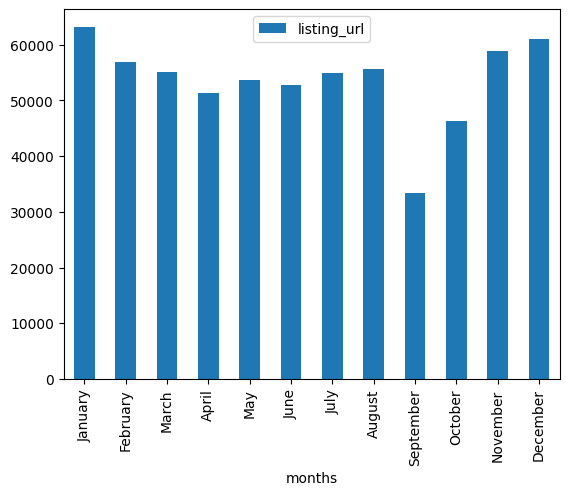

In [13]:
Monthly_stats.plot(x = 'months', y = 'listing_url', kind='bar')

<AxesSubplot: xlabel='months', ylabel='clean_price'>

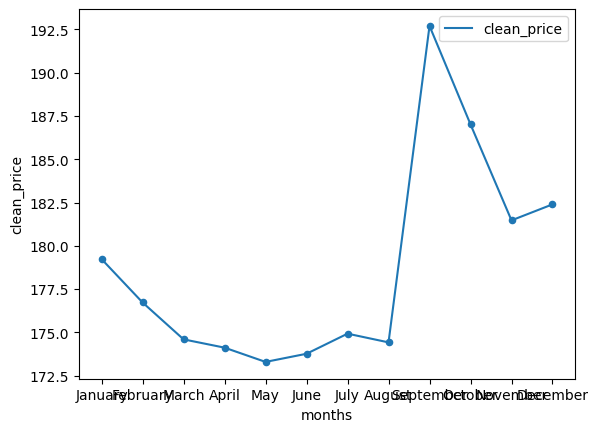

In [14]:
Ax = Monthly_stats.plot(x = 'months', y = 'clean_price', kind='scatter')
Monthly_stats.plot(x = 'months', y = 'clean_price', kind='line', ax=Ax)

<AxesSubplot: xlabel='listing_url', ylabel='clean_price'>

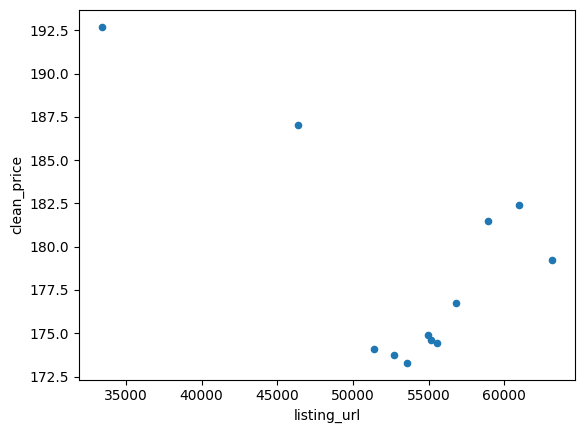

In [15]:
Monthly_stats.plot(x = 'listing_url', y = 'clean_price', kind='scatter')

# Question 3

## Which properties or features of the listing are associated with high prices?


In [16]:
df_boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [17]:
Boston_dt.groupby('bedrooms').agg({'clean_price': 'mean'})

,clean_price
bedrooms,
0.0,154.668990
1.0,136.321008
2.0,258.753247
3.0,316.419355
4.0,389.400000
5.0,429.000000


In [18]:
df_boston_listings = df_boston_listings.assign(clean_price = pd.to_numeric(df_boston_listings['price'].str.replace('$','',regex = False).str.replace(',','',regex = False)))

In [19]:
def get_avg_price(col):
    return df_boston_listings.groupby(col).agg({'clean_price': ['mean', 'std', 'count']})


In [20]:
get_avg_price(["room_type", 'bedrooms'])

clean_price                  
                                mean         std count
room_type       bedrooms                              
Entire home/apt 0.0       154.668990   49.813623   287
                1.0       200.280130  158.715454   921
                2.0       258.753247  150.956903   693
                3.0       316.419355  174.094275   155
                4.0       389.400000  176.750260    45
                5.0       429.000000  297.732766    16
Private room    1.0        96.041364   85.093706  1378
Shared room     1.0        92.762500  108.733822    80

In [21]:
get_avg_price(['smart_location'])

clean_price                  
                                     mean         std count
smart_location                                             
ALLSTON, MA                    165.000000  183.847763     2
Allston, MA                     73.250000   20.325197    12
Boston (Charlestown), MA       200.000000         NaN     1
Boston (Jamaica Plain), MA      75.000000         NaN     1
Boston , MA                     65.000000         NaN     1
Boston, MA                     176.789116  150.059320  3381
Boston, Massachusetts, US, MA   50.000000   35.355339     2
Brighton , MA                   90.000000         NaN     1
Brighton, MA                   108.400000   63.348018    15
Brookline, MA                  135.888889   75.153873    18
Cambridge, MA                  199.375000  105.149338    16
Charlestown, MA                262.533333  220.841852    15
Dorchester, MA                  75.466667   55.918137    15
East Boston, MA                134.666667  100.599867     3
Hyde Park, MA                   77.500000   38.890873     2
Jamaica Plain (Boston), MA     150.000000         NaN     1
Jamaica Plain , MA              68.500000   10.606602     2
Jamaica Plain, Boston, MA      119.000000   43.840620     2
Jamaica Plain, MA              178.055556  111.484883    18
Jamaica Plain, MA, MA          120.000000         NaN     1
Jamaica plain , MA             125.000000         NaN     1
MA                              71.500000    4.949747     2
Mattapan, MA                    85.000000   17.320508     3
Milton, MA                      50.000000         NaN     1
Mission Hill, Boston, MA        85.000000         NaN     1
Newton, MA                      90.000000         NaN     1
ROXBURY CROSSING, MA            72.500000   18.484228     4
Roslindale, Boston, MA         200.000000         NaN     1
Roslindale, MA                  83.000000   23.579652     6
Roxbury Crossing, MA            98.041667   70.849184    24
Somerville, MA                  91.947368   57.081300    19
South Boston, MA               132.000000   60.811183     2
South End, Boston, MA          450.000000         NaN     1
Watertown, MA                   60.000000         NaN     1
West Roxbury, MA                85.600000   32.852702     5
boston, MA                      50.000000         NaN     1
dorchester, boston , MA         52.000000         NaN     1
east Boston , MA                80.000000         NaN     1
波士顿, MA                        100.000000         NaN     1

In [22]:
get_avg_price(['accommodates'])

clean_price                  
                    mean         std count
accommodates                              
1              85.507973  104.699916   439
2             131.139582   88.707719  1483
3             180.436916   99.454052   428
4             227.844615  214.820394   650
5             254.800000  128.333505   245
6             275.315271  125.589222   203
7             323.820513  189.643831    39
8             348.581818  202.818446    55
9             351.100000  260.665580    10
10            370.473684  164.216784    19
11            357.500000   86.938676     4
12            505.800000  138.548547     5
14            410.000000  119.209899     3
16            162.500000   53.033009     2

In [23]:
get_avg_price(['bed_type'])

clean_price                  
                     mean         std count
bed_type                                   
Airbed          78.675000   82.029822    40
Couch           99.600000   59.673556    10
Futon           85.254902   40.607311    51
Pull-out Sofa  101.612903   54.262128    31
Real Bed       177.203301  149.712186  3453

In [24]:
get_avg_price(['host_response_time'])

clean_price                  
                          mean         std count
host_response_time                              
a few days or more  150.627907  161.647916    43
within a day        155.127932   95.890165   469
within a few hours  190.050082  121.598576  1218
within an hour      160.638728  114.860113  1384

In [25]:
get_avg_price(['cleaning_fee'])

clean_price                  
                    mean         std count
cleaning_fee                              
$10.00         82.160305   39.693599   131
$100.00       257.759207  110.055365   353
$105.00       250.000000         NaN     1
$110.00       146.000000   31.421861     4
$115.00       196.000000   29.206164     3
...                  ...         ...   ...
$85.00        239.428571  144.002168    28
$9.00          92.333333    6.658328     3
$90.00        236.333333   88.820374    18
$95.00        224.227848   60.454465    79
$99.00        152.785714   74.900117    14

[79 rows x 3 columns]

In [26]:
get_avg_price(["minimum_nights", 'maximum_nights'])

clean_price                 
                                      mean        std count
minimum_nights maximum_nights                              
1              1                 83.666667  53.042579    12
               2                133.571429  87.163608    14
               3                131.875000  50.639658    24
               4                100.684211  53.974328    19
               5                109.521739  49.836888    23
...                                    ...        ...   ...
90             365               99.000000        NaN     1
               1125              45.000000        NaN     1
200            1125            1000.000000        NaN     1
273            364               58.000000        NaN     1
300            365               55.000000        NaN     1

[280 rows x 3 columns]

In [27]:
get_avg_price(['review_scores_rating', 'review_scores_cleanliness'])

clean_price                  
                                                      mean         std count
review_scores_rating review_scores_cleanliness                              
20.0                 2.0                         82.600000   91.993478     5
                     10.0                        57.000000         NaN     1
40.0                 2.0                         70.500000   45.858478     4
                     3.0                         68.000000         NaN     1
                     4.0                        169.000000         NaN     1
...                                                    ...         ...   ...
99.0                 9.0                         73.000000         NaN     1
                     10.0                       214.734375  132.613083    64
100.0                8.0                        164.666667  130.479325    33
                     9.0                        167.515152  159.249631    33
                     10.0                       185.307692  137.538571   559

[148 rows x 3 columns]

In [28]:
get_avg_price(['review_scores_location'])

clean_price                  
                              mean         std count
review_scores_location                              
2.0                     120.000000   74.913283     4
3.0                      75.000000         NaN     1
4.0                     153.111111  185.925687     9
5.0                      55.600000   15.109600     5
6.0                      94.777778  109.043195    18
7.0                     144.534884  123.299162    43
8.0                     126.814346   91.770251   237
9.0                     139.836562   93.576007   826
10.0                    188.138272  119.316307  1620

In [29]:
df_boston_listings = df_boston_listings.assign(
    bedrooms_class = pd.cut(df_boston_listings['bedrooms'], 
                            bins= [0, 1, 2,3, np.Inf], 
                            include_lowest=True, 
                            labels=['upto 1bedroom', '2bedrooms', '3bedrooms', '3bedrooms plus']))

In [30]:
(get_avg_price(["room_type", 'bedrooms_class'])
    .dropna(axis = 0))

clean_price                  
                                      mean         std count
room_type       bedrooms_class                              
Entire home/apt upto 1bedroom   189.443709  142.006693  1208
                2bedrooms       258.753247  150.956903   693
                3bedrooms       316.419355  174.094275   155
                3bedrooms plus  399.786885  213.024655    61
Private room    upto 1bedroom    96.041364   85.093706  1378
Shared room     upto 1bedroom    92.762500  108.733822    80

# Question 4 

## Can we predict the price with those features to inform new hosts? 

In [31]:
df_boston_listings = df_boston_listings.assign(host_start_date = pd.to_datetime(df_boston_listings['host_since']))

In [32]:
from datetime import datetime
today= datetime.today()

In [33]:
(today - df_boston_listings['host_start_date'])/np.timedelta64(1,'Y')

0        7.585782
1       10.438681
2       13.513351
3        9.568027
4        8.513933
          ...    
3580     8.292162
3581     7.372226
3582     8.834268
3583     6.468716
3584     7.238068
Name: host_start_date, Length: 3585, dtype: float64

In [34]:
df_boston_listings = df_boston_listings.assign(bedrooms_class = pd.cut(df_boston_listings['bedrooms'], bins= [0, 1, 2,3, np.Inf], include_lowest=True, labels=['upto 1bedroom', '2bedrooms', '3bedrooms', '3bedrooms plus']))

In [35]:
df = df_boston_listings[['price','bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness']].dropna()

In [36]:
Y = df['price'].str.replace('$', '', regex= False).str.replace(',', '', regex= False).astype(float)
X = df[['bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness']]

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
lin_reg = LinearRegression(normalize= True)

In [39]:
X_train, X_train, Y_train, Y_train = train_train_split(X,Y,test_size=0.33, random_state= 416)

In [40]:
scaler= StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[-0.34204825, -0.59646192,  0.60225709,  0.53006449,  0.64545531],
       [ 0.93715659,  0.48587529, -0.42762492, -0.11626995,  0.64545531],
       [ 0.93715659,  0.48587529,  1.63213909, -0.22399235, -1.11661853],
       ...,
       [-0.34204825, -0.05529331, -0.42762492,  0.09917487, -0.23558161],
       [-0.34204825, -1.13763053, -0.42762492,  0.53006449, -0.23558161],
       [-0.34204825, -1.13763053, -0.42762492, -1.30121642, -1.11661853]])

In [41]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    ])

In [42]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [43]:
Y_train_predict = pipe.predict(X_train)
r2_score(Y_train, Y_train_predict)

0.4096063809687781

In [44]:
Y_train_predict = pipe.predict(X_train)
r2_score(Y_train, Y_train_predict)

0.366125323301041

In [45]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(drop= 'first')
encoder.fit_transform(df_boston_listings['room_type'].values.reshape(-1,1))

<3585x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1458 stored elements in Compressed Sparse Row format>

In [46]:
pipe = Pipeline([
    ('onehot', OneHotEncoder(drop= 'first')),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    ])

In [47]:
df = df_boston_listings[['price','bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness', 'room_type']].dropna()
Y = df['price'].str.replace('$', '', regex= False).str.replace(',', '', regex= False).astype(float)
X = df[['bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness', 'room_type']]

In [49]:
numeric_vars = ['bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness']
categorical_vars = ['room_type']
numeric_pipe = Pipeline([('scaler', StandardScaler())])
categorical_pipe = Pipeline([('onehot', OneHotEncoder(drop= 'first'))])
preprocessor = ColumnTransformer(
    transformers= [
        ('numeric', numeric_pipe, numeric_vars), 
        ('categorical', categorical_pipe, categorical_vars)
    ]
)

In [51]:
model_pipe = Pipeline(
    steps= [
        (
        'preprocessor', preprocessor), 
        ('regressor', LinearRegression())
    ]
)

In [54]:
model_pipe.fit(X_train, Y_train)
Y_train_predict = model_pipe.predict(X_train)
r2_score(Y_train, Y_train_predict)

0.5179602682620322

In [55]:
Y_test_predict = model_pipe.predict(X_test)
r2_score(Y_test, Y_test_predict)

0.5377459290227082

In [40]:
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [41]:
Y_train_predict = lin_reg.predict(X_train)

In [42]:
r2_score(Y_train, Y_train_predict)

0.4096063809687781

# Question 5 

## Does the number of listing in an area impact the price in that neighbourhood? 

In [43]:
get_avg_price(['neighbourhood_cleansed'])

clean_price                  
                               mean         std count
neighbourhood_cleansed                               
Allston                  112.307692   79.980147   260
Back Bay                 240.950331  130.481478   302
Bay Village              266.833333  148.640701    24
Beacon Hill              224.443299  162.333947   194
Brighton                 118.767568   98.491254   185
Charlestown              198.045045  135.660297   111
Chinatown                232.352113   87.948053    71
Dorchester                91.639405   56.984681   269
Downtown                 236.459302   99.179108   172
East Boston              119.153333   66.080969   150
Fenway                   220.393103  265.336016   290
Hyde Park                 86.548387   66.468458    31
Jamaica Plain            138.478134  104.015175   343
Leather District         253.600000   93.417343     5
Longwood Medical Area    138.444444  102.898143     9
Mattapan                  75.125000   33.171901    24
Mission Hill             121.967742  103.742641   124
North End                195.678322   93.497880   143
Roslindale                98.428571   54.793449    56
Roxbury                  146.333333  152.956916   144
South Boston             187.609195  125.155243   174
South Boston Waterfront  306.060241  338.001203    83
South End                204.349693  119.290546   326
West End                 209.591837   79.530895    49
West Roxbury             107.108696   67.772570    46

In [44]:
df_boston_reviews.info()
df_boston_reviews.head(n=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [45]:
df_boston_calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [46]:
df_boston_calendar.head(n=100)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
95,12147973,2016-12-18,f,NaN
96,12147973,2016-12-17,f,NaN
97,12147973,2016-12-16,f,NaN
98,12147973,2016-12-15,f,NaN


In [47]:
df_boston_listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3585 non-null   int64         
 1   listing_url                       3585 non-null   object        
 2   scrape_id                         3585 non-null   int64         
 3   last_scraped                      3585 non-null   object        
 4   name                              3585 non-null   object        
 5   summary                           3442 non-null   object        
 6   space                             2528 non-null   object        
 7   description                       3585 non-null   object        
 8   experiences_offered               3585 non-null   object        
 9   neighborhood_overview             2170 non-null   object        
 10  notes                             1610 non-null 

In [48]:
df_boston_listings.head(n=50)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,clean_price,bedrooms_class,host_start_date
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,250.0,2bedrooms,2015-04-15
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,NaN,t,moderate,f,f,1,1.30,65.0,upto 1bedroom,2012-06-07
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,NaN,f,moderate,t,f,1,0.47,65.0,upto 1bedroom,2009-05-11
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,NaN,f,moderate,f,f,1,1.00,75.0,upto 1bedroom,2013-04-21
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,NaN,f,flexible,f,f,1,2.25,79.0,upto 1bedroom,2014-05-11
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,NaN,f,flexible,f,f,1,1.70,75.0,upto 1bedroom,2016-03-23
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,NaN,f,strict,f,f,3,4.00,100.0,upto 1bedroom,2013-05-25
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,NaN,f,moderate,t,t,2,2.38,75.0,upto 1bedroom,2012-08-05
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,NaN,f,moderate,f,f,1,5.36,58.0,upto 1bedroom,2012-10-24
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...

In [49]:
df_seattle_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [50]:
df_seattle_reviews.head(n=50)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


# seattle Analysis

In [51]:
df_seattle_calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [52]:
df_seattle_calendar.head(n=50)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


df_seattle_listings.info()

In [53]:
df_seattle_listings.head(n=50)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


price should be converted to float 

date will be separated to year/month/day


# Data Preparation 